In [1]:
%matplotlib inline
import geopandas as gpd
from shapely.geometry import LineString, Point, Polygon
import random
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
plt.style.use('ggplot')

In [2]:
ist_gdf = gpd.read_file("C:/Users/Efeakm/Downloads/veri-analizi_parklar-ve-yesil-alanlar-main/Data/GIS data/Processed")
ist_gdf

,OBJECTID,district_t,district_e,Shape_Leng,Shape_Area,continent,geometry
0,1,Şi̇şli̇,Sisli,0.187408,0.001147,eur,"POLYGON ((29.00802 41.08488, 29.00928 41.08346..."
1,3,Şi̇le,Sile,1.862735,0.085721,anat,"POLYGON ((29.84881 41.01343, 29.84697 41.01245..."
2,70,Adalar,Adalar,0.548223,0.001186,anat,"MULTIPOLYGON (((29.14379 40.85561, 29.14381 40..."
3,155,Arnavutköy,Arnavutkoy,1.167397,0.048664,eur,"POLYGON ((28.64241 41.09662, 28.64213 41.09582..."
4,165,Ataşehi̇r,Atasehir,0.342889,0.002713,anat,"POLYGON ((29.11148 40.95911, 29.10674 40.96328..."
5,169,Çatalca,Catalca,2.228917,0.122963,eur,"POLYGON ((28.07199 41.29998, 28.07430 41.30976..."
6,174,Avcilar,Avcilar,0.441871,0.005411,eur,"POLYGON ((28.74479 41.06209, 28.74531 41.06124..."
7,203,Başakşehi̇r,Basaksehir,0.615359,0.011455,eur,"POLYGON ((28.83303 41.06810, 28.82897 41.06974..."
8,204,Bağcilar,Bagcilar,0.243536,0.002403,eur,"POLYGON ((28.81166 41.06125, 28.81247 41.06191..."
9,214,Bahçeli̇evler,Bahcelievler,0.220382,0.001788,eur,"POLYGON ((28.81095 41.02725, 28.81339 41.02669..."


In [3]:
#Rastgele bir scooter generator'i olusturuyor
def rota_generator(x , y):
    points = []
    
    for i in range(9):
        increment_x = random.choice([-10,10]) * 0.001
        increment_y = random.choice([-10,10]) * 0.001
        
        x += increment_x
        y += increment_y
        
        points.append(Point(x,y))
        
    return LineString(points[4:])


# Bir area olusturuyor
def area_generator(x, y):
    a = 0.1
    return Polygon([ (x,y), (x + a, y), (x+a, y+a), (x, y+a) ])

In [4]:
num_rotas = 15
d = {'name':['rota_' + str(i) for i in range(num_rotas)], 'geometry':[rota_generator(29.25,41) for i in range(num_rotas)]}
rotas_gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")

rotas_gdf

,name,geometry
0,rota_0,"LINESTRING (29.24000 40.97000, 29.23000 40.980..."
1,rota_1,"LINESTRING (29.26000 40.99000, 29.27000 40.980..."
2,rota_2,"LINESTRING (29.28000 40.99000, 29.29000 40.980..."
3,rota_3,"LINESTRING (29.24000 41.05000, 29.25000 41.060..."
4,rota_4,"LINESTRING (29.28000 41.01000, 29.27000 41.000..."
5,rota_5,"LINESTRING (29.28000 41.03000, 29.29000 41.040..."
6,rota_6,"LINESTRING (29.26000 41.01000, 29.25000 41.020..."
7,rota_7,"LINESTRING (29.24000 40.99000, 29.25000 41.000..."
8,rota_8,"LINESTRING (29.26000 41.01000, 29.27000 41.000..."
9,rota_9,"LINESTRING (29.26000 40.95000, 29.25000 40.960..."


In [5]:
d = {'yasakli_alan':['name'], 'geometry': [area_generator(29.2,40.9)  ]}
areas_gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
areas_gdf

,yasakli_alan,geometry
0,name,"POLYGON ((29.20000 40.90000, 29.30000 40.90000..."


Text(0.5, 1.0, 'Istanbul Scooter Rotalari')

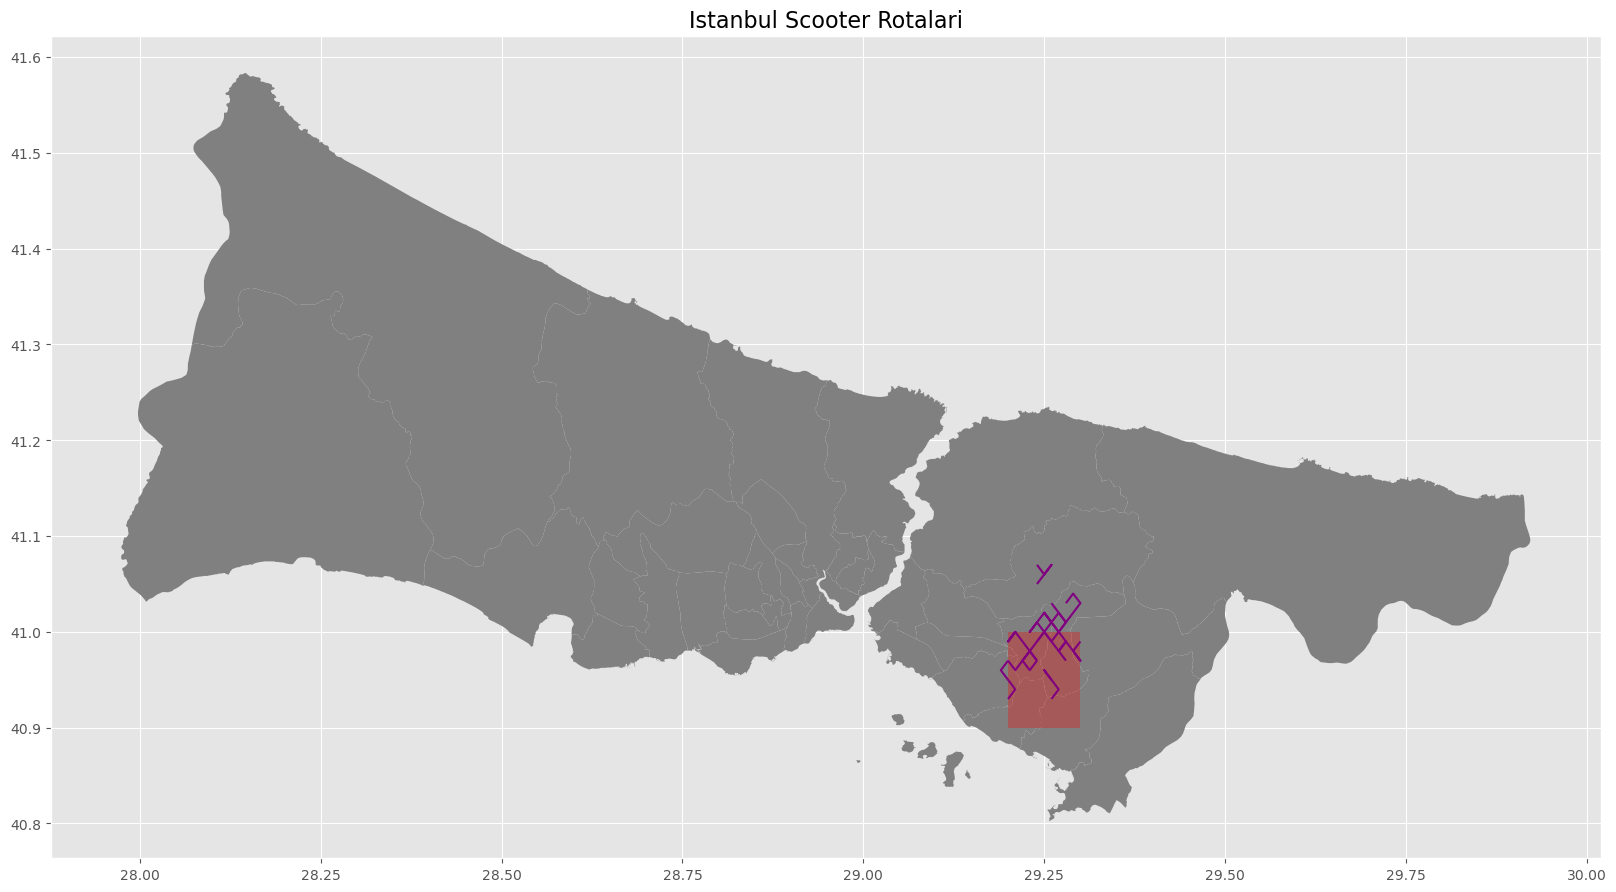

In [6]:

ax = ist_gdf.plot(figsize = (20,20),color = 'gray', label = 'IST')
rotas_gdf.plot(ax = ax, color = 'purple', label = 'rota')
areas_gdf.plot(ax = ax, color = 'red', alpha = 0.3, legend = True)
ax.set_title('Istanbul Scooter Rotalari', fontsize = 16)


In [7]:
style1 = {'fillColor': '#f44336', 'color': '#f44336'}
style2 = {'fillColor': '#3A5450', 'color': '#3A5450', 'weight':'3'}

m = folium.Map(location=[41.00, 29.00], zoom_start = 10)
folium.GeoJson(rotas_gdf['geometry'], style_function=lambda x:style2).add_to(m)
folium.GeoJson(areas_gdf['geometry'], style_function = lambda x:style1).add_to(m)

m

In [14]:
def scooter_generator(x ,y, num_scooter = 10):
    points = []
    
    for i in range(num_scooter):
        increment_x = random.randint(-10,10) * 0.001
        increment_y = random.randint(-10,10) * 0.001
        
        x_new = x + increment_x
        y_new = y + increment_y
        
        points.append([x_new,y_new])
        
        
    return points

In [21]:
gdf1 = scooter_generator(41 , 29.05, 10)
gdf2 = scooter_generator(41.1 , 29.2, 15)
gdf3 = scooter_generator(41.2 , 28.7, 5)

In [22]:
m = folium.Map(location=[41.00, 29.00], zoom_start = 10)
cluster = MarkerCluster(name = "Scooters").add_to(m)
for item in gdf1:
    folium.Marker(item).add_to(cluster)
for item in gdf2:
    folium.Marker(item).add_to(cluster)
for item in gdf3:
    folium.Marker(item).add_to(cluster)

m